<a href="https://colab.research.google.com/github/microprediction/precise/blob/main/manager_elo_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --pre pycaret

In [ ]:
!pip install catboost

In [1]:
from pycaret.regression import *

'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.


In [93]:
import pandas as pd
CSV = 'https://raw.githubusercontent.com/microprediction/precise/main/precise/skatervaluation/battleresults/example_manager_regressor_frame.csv'
df = pd.read_csv(CSV)
print(df[:2].transpose())

                       0            1
weakxz_hot       0.00000     0.000000
sk_hot           0.00000     0.000000
weak_hot         0.00000     0.000000
sharpe_hot       0.00000     0.000000
tzero_hot        0.00000     1.000000
mcd_hot          0.00000     0.000000
d_ord                NaN          NaN
lw_hot           0.00000     0.000000
hrp_hot          0.00000     0.000000
diagxx_hot       0.00000     0.000000
h_ord                NaN          NaN
g_ord           50.00000     0.000000
pm_hot           0.00000     1.000000
glcv_hot         0.00000     0.000000
ldp_hot          0.00000     0.000000
l_ord                NaN          NaN
diag_hot         0.00000     0.000000
weakxy_hot       0.00000     1.000000
ewa_hot          1.00000     0.000000
volxx_hot        1.00000     0.000000
quad_hot         0.00000     0.000000
ppo_hot          0.00000     0.000000
r_ord           50.00000    50.000000
equal_hot        0.00000     0.000000
s_ord            5.00000     5.000000
vol_hot     

In [ ]:
# Filter on things we are pretty sure are good

In [95]:
good = ['schur_hot','hrp_hot','weakxy_hot', 'weakxx_hot','volxy_hot','rp_hot','s_ord','h_ord','ewa_hot','pm_hot']
bad = ['ldp_hot','quad_hot','glcv_hot','diagxy_hot','diagxx_hot']
results = df[good+['elo']].groupby(good).mean().reset_index()
results.sort_values('elo',ascending=False)

,schur_hot,hrp_hot,weakxy_hot,weakxx_hot,volxy_hot,rp_hot,s_ord,h_ord,ewa_hot,pm_hot,elo
6,1.0,0.0,1.0,1.0,0.0,0.0,100.0,500.0,0.0,1.0,1561.310477
1,1.0,0.0,1.0,1.0,0.0,0.0,25.0,125.0,1.0,0.0,1546.060272
5,1.0,0.0,1.0,1.0,0.0,0.0,25.0,500.0,1.0,0.0,1543.805215
4,1.0,0.0,1.0,1.0,0.0,0.0,25.0,500.0,0.0,1.0,1540.036976
3,1.0,0.0,1.0,1.0,0.0,0.0,25.0,150.0,1.0,0.0,1536.879873
7,1.0,0.0,1.0,1.0,0.0,0.0,100.0,500.0,1.0,0.0,1536.394294
0,1.0,0.0,1.0,1.0,0.0,0.0,25.0,125.0,0.0,1.0,1531.754501
2,1.0,0.0,1.0,1.0,0.0,0.0,25.0,150.0,0.0,1.0,1514.088155


In [63]:
df[df['hrp_hot']==1]

,lw_hot,sharpe_hot,volxx_hot,ppo_hot,ewa_hot,vol_hot,molyboga_hot,slurp_hot,p_ord,l_ord,...,s_ord,g_ord,volxy_hot,d_ord,ldp_hot,weak_hot,quad_hot,glcv_hot,diagxy_hot,elo
7,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,...,50.0,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,1592.566701
30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,5.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1553.401308
68,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,10.0,...,50.0,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,1506.917292
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,5.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1492.144539
128,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,50.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1450.077690


In [98]:
# Try other things? 
regs = ['weakxz_hot','s_ord']
df[regs+['elo']].groupby(regs).mean()

elo
weakxz_hot s_ord             
0.0        5.0    1514.228260
           25.0   1507.891482
           50.0   1503.555714
           100.0  1484.250318

In [75]:
# Filter out stuff
df = df[df['ewa_hot']==1]

    g_ord          elo
0    50.0  1603.729720
3    10.0  1599.066149
8     0.0  1591.970503
10  100.0  1589.653471
12  100.0  1585.004234
15  100.0  1579.176272
16   10.0  1575.915062
17   10.0  1573.901016
21  100.0  1565.687791
24   50.0  1560.577551
33  100.0  1549.777725
37  100.0  1547.859956
39  100.0  1544.260587
40    0.0  1542.755357
43   50.0  1541.632553
45    0.0  1540.272444
52  100.0  1523.010862
54  100.0  1521.922639
75  100.0  1494.583474
80  100.0  1491.529955


,elo
g_ord,
0.0,1558.332768
10.0,1582.960742
50.0,1568.646608
100.0,1544.769724


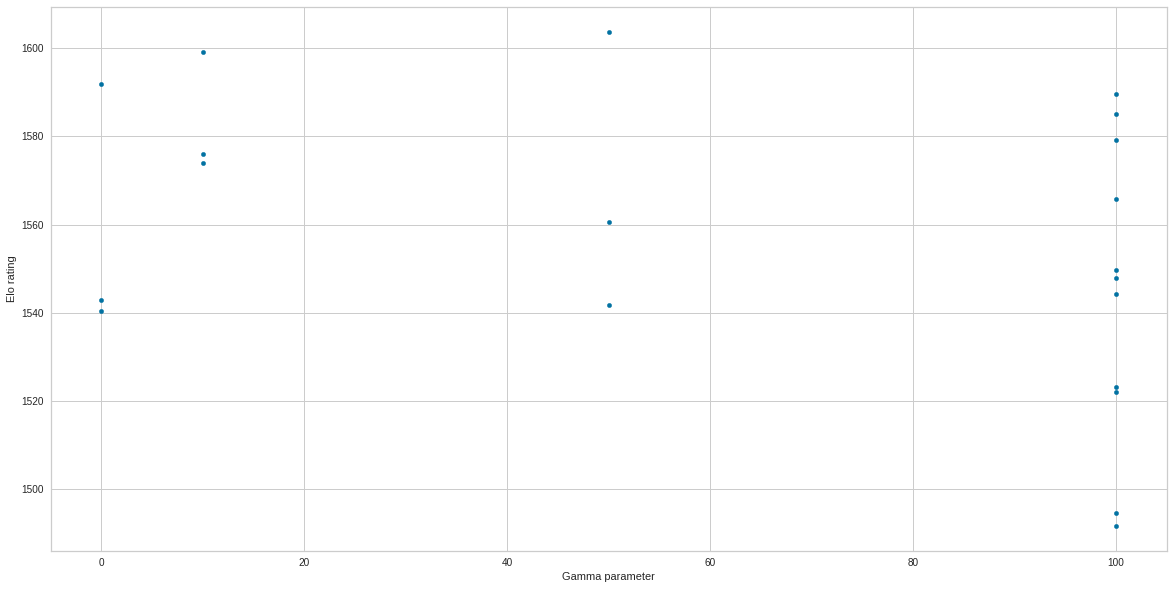

In [92]:
# Looking at the impact of the Gamma parameter 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

# Schur gamma analysis
df_schur = df[ (df['schur_hot']==1) & ((df['weakxy_hot']==1) & (df['weakxy_hot']==1) | (df['volxy_hot']==1)) ]
print( df_schur[['g_ord','elo']].sort_values('elo',ascending=False))
ax = df_schur[['g_ord','elo']].plot.scatter(x='g_ord',y='elo')
ax.set_xlabel('Gamma parameter')
ax.set_ylabel('Elo rating')
df_schur[['g_ord','elo']].groupby('g_ord').mean()



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,



,elo
g_ord,
-100.0,1549.741996
0.0,1566.121473
10.0,1586.483583
50.0,1551.105052
100.0,1550.093701


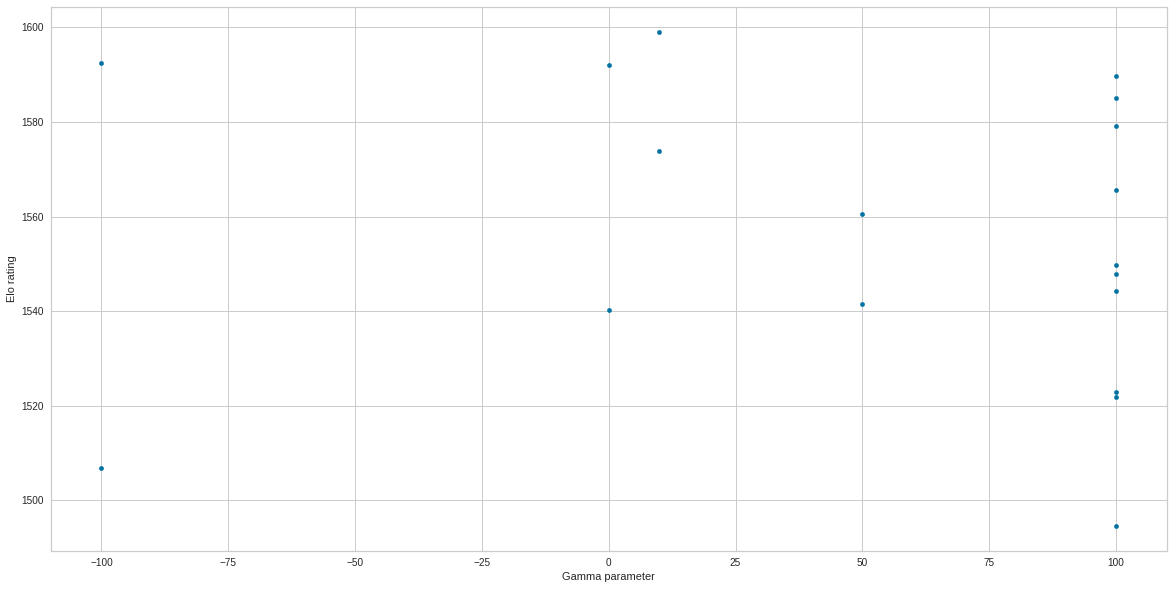

In [87]:
df_schur_or_hrp = df[ ( (df['schur_hot']==1) | (df['hrp_hot']==1))  ]
df_schur_or_hrp = df[ ( (df['hrp_hot']==1) ) | ( (df['schur_hot']==1)) & ((df['weakxy_hot']==1) & (df['weakxy_hot']==1))  ]
df_schur_or_hrp.fillna(value=-100,inplace=True)
ax = df_schur_or_hrp[['g_ord','elo']].plot.scatter(x='g_ord',y='elo')
ax.set_xlabel('Gamma parameter')
ax.set_ylabel('Elo rating')
df_schur_or_hrp[['g_ord','elo']].groupby('g_ord').mean()

In [88]:

ord_cols = [ c for c in df_schur_or_hrp if '_ord' in c]
dg = df_schur_or_hrp[['elo']+ord_cols+['hrp_hot','schur_hot']]
dg.sort_values('elo',ascending=False)



,elo,p_ord,l_ord,r_ord,h_ord,n_ord,s_ord,g_ord,d_ord,hrp_hot,schur_hot
3,1599.066149,-100.0,-100.0,50.0,-100.0,25.0,5.0,10.0,-100.0,0.0,1.0
7,1592.566701,-100.0,-100.0,25.0,-100.0,50.0,50.0,-100.0,-100.0,1.0,0.0
8,1591.970503,-100.0,-100.0,50.0,-100.0,25.0,5.0,0.0,-100.0,0.0,1.0
10,1589.653471,-100.0,-100.0,50.0,-100.0,25.0,5.0,100.0,-100.0,0.0,1.0
12,1585.004234,-100.0,-100.0,25.0,-100.0,50.0,5.0,100.0,-100.0,0.0,1.0
15,1579.176272,-100.0,-100.0,50.0,150.0,25.0,25.0,100.0,-100.0,0.0,1.0
17,1573.901016,-100.0,-100.0,25.0,-100.0,50.0,5.0,10.0,-100.0,0.0,1.0
21,1565.687791,-100.0,-100.0,50.0,500.0,25.0,25.0,100.0,-100.0,0.0,1.0
24,1560.577551,-100.0,-100.0,50.0,-100.0,25.0,5.0,50.0,-100.0,0.0,1.0
33,1549.777725,-100.0,-100.0,50.0,500.0,25.0,100.0,100.0,-100.0,0.0,1.0


In [89]:
dg.groupby(['s_ord']).mean().reset_index().sort_values('elo',ascending=False)

,s_ord,elo,p_ord,l_ord,r_ord,h_ord,n_ord,g_ord,d_ord,hrp_hot,schur_hot
0,5.0,1572.759740,-100.0,-100.0,37.5,-100.000000,37.5,40.0,-100.0,0.0,1.0
2,50.0,1549.741996,-100.0,-45.0,25.0,-100.000000,50.0,-100.0,-100.0,1.0,0.0
1,25.0,1542.248453,-100.0,-100.0,37.5,258.333333,37.5,100.0,-100.0,0.0,1.0
3,100.0,1536.394294,-100.0,-100.0,37.5,500.000000,37.5,100.0,-100.0,0.0,1.0


<AxesSubplot:xlabel='s_ord', ylabel='elo'>

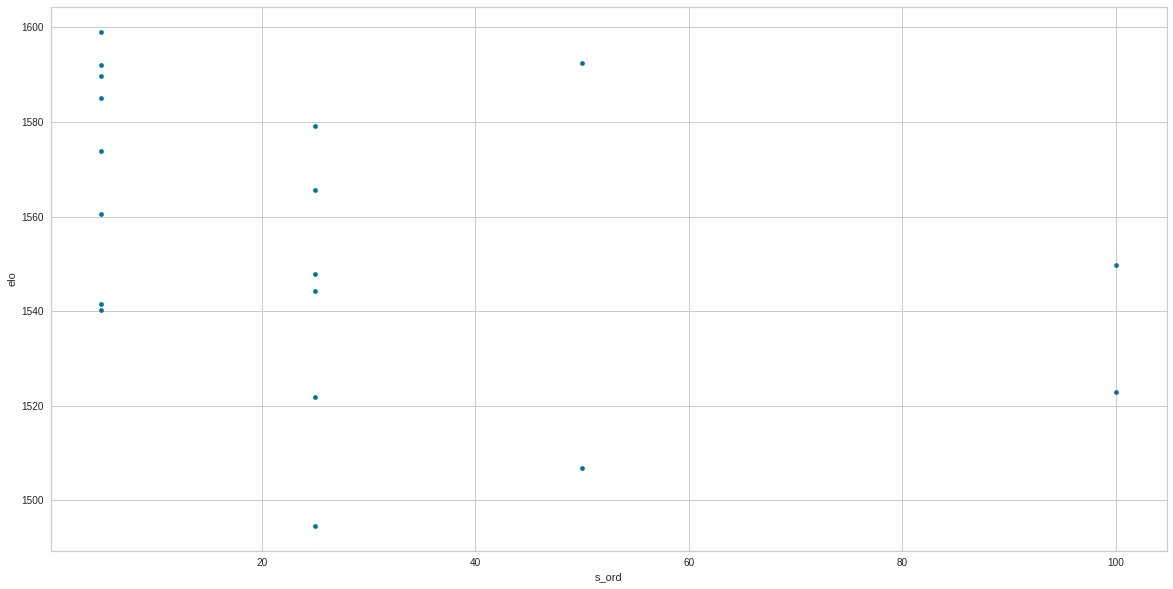

In [90]:
# Impact of size 
dg.plot.scatter(x='s_ord',y='elo')

In [ ]:
from pycaret.regression import *

In [17]:
clf1 = setup(data = dg, target = 'elo')

INFO:logs:PyCaret RegressionExperiment
INFO:logs:Logging name: reg-default-name
INFO:logs:ML Usecase: MLUsecase.REGRESSION
INFO:logs:version 3.0.0.rc3
INFO:logs:Initializing setup()
INFO:logs:self.USI: bbba
INFO:logs:self.variable_keys: {'_all_models_internal', 'transform_target_method_param', 'log_plots_param', 'transform_target_param', 'html_param', 'USI', '_all_metrics', 'fold_groups_param', 'target_param', 'X_test', '_all_models', 'logging_param', 'memory', 'fold_shuffle_param', 'seed', 'y_train', 'n_jobs_param', '_available_plots', 'gpu_param', 'data', 'y_test', 'display_container', 'pipeline', 'y', 'exp_name_log', 'X_train', '_ml_usecase', '_gpu_n_jobs_param', 'fold_generator', 'variable_keys', 'idx', 'exp_id', 'X', 'master_model_container'}
INFO:logs:Checking environment
INFO:logs:python_version: 3.7.13
INFO:logs:python_build: ('default', 'Apr 24 2022 01:04:09')
INFO:logs:machine: x86_64
INFO:logs:platform: Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
INFO:logs:Memory: svmem(t

,Description,Value
0,Session id,7500
1,Target,elo
2,Target type,Regression
3,Data shape,"(60, 8)"
4,Train data shape,"(41, 8)"
5,Test data shape,"(19, 8)"
6,Numeric features,8
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:setup() successfully completed in 2.29s...............


In [ ]:
best = compare_models()

In [23]:
print(best)

RandomForestRegressor(n_jobs=-1, random_state=7500)


In [24]:
evaluate_model(best)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(self=<pycaret.regression.oop.RegressionExperiment object at 0x7f77f7b89210>, estimator=RandomForestRegressor(n_jobs=-1, random_state=7500), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…